## 02-Lab - DBSCAN Clustering

This is the dataset of wheat seeds for various varieties.
The dataset contains 209 randomly selected instances of wheat seed information.

Here is the descrition of the fields.

1. area A, 
2. perimeter P, 
3. compactness $C = 4*pi*A/P^2$, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
All of these parameters were real-valued continuous.

You are required to prepare the data, use DBSCAN clustering to group them according to the variety, find appropriate number of clusters and finally add labels to the data.



In [1]:
# Use DBSCAN clustering
import pandas as pd
import numpy as np 
columns = ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel','asymmetry', 'length_groove','class']
seeds = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/seeds_dataset.csv', names=columns ).dropna()



We need to find a viable candidate for showing dbscan clustering. DBSCAN works well when we have dense clusters which are well separated. The separation can be minimal but it must be sharp enough for DBSCAN to work. We can use the seaborn pairplot to find a viable candidate in the dataset. 


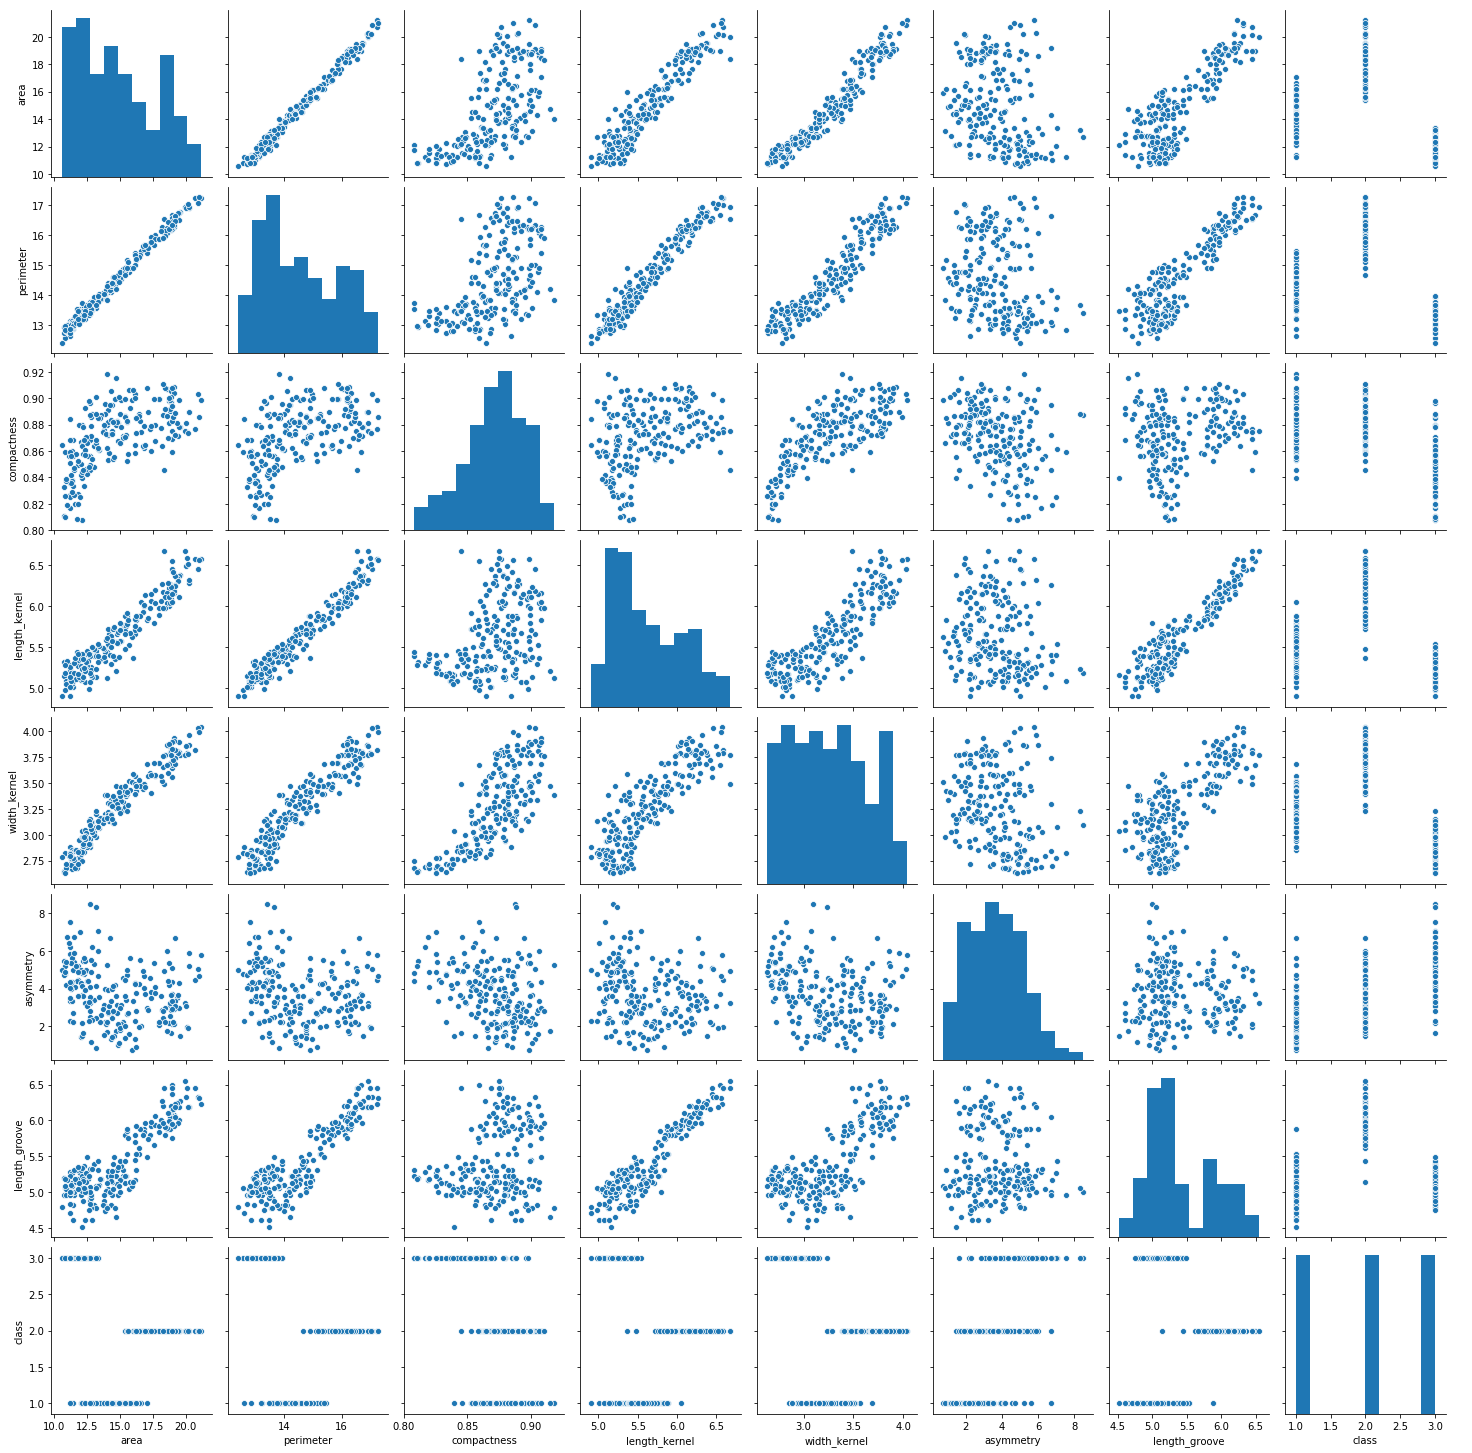

In [2]:
import seaborn as sb
sb.pairplot(seeds)


We pick length_groove vs compactness since there two well defined clusters.

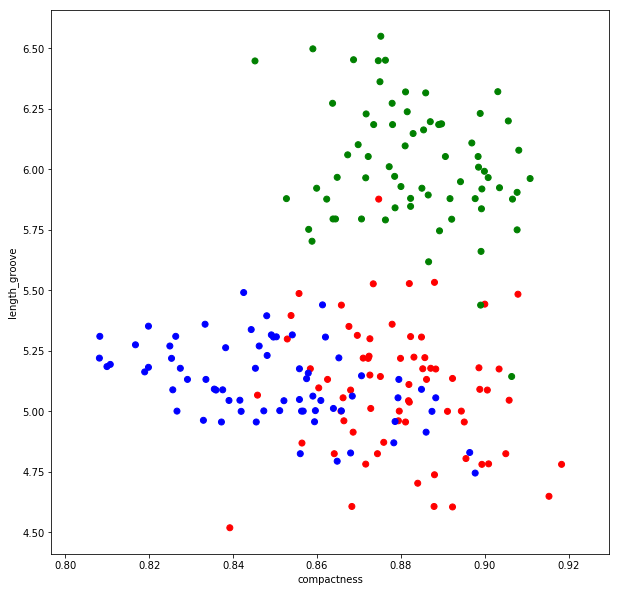

In [3]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

# plotting compactness vs length_groove. We are choosing these two parameters
data_set = seeds[['length_groove', 'compactness','class']]
x = data_set["compactness"]
y = data_set["length_groove"]

colors =["red", "green","blue"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(x,y, c=data_set['class'], cmap=cmap)
plt.xlabel('compactness')
plt.ylabel('length_groove')
plt.show()

 The labels however, tell a different story. Two of the labels are mixed together and form the bottom cluster. DBSCAN cannot distinguish between those two clusters. The best we can two is identify the difference between the top and the bottom cluster.

In [4]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

train_data_full, test_data = train_test_split(data_set, test_size=0.10, random_state=12)
train_data = train_data_full.drop(columns='class')

train_shape = train_data.shape
print("Shape of training set is {}".format(train_shape))

Shape of training set is (189, 2)


Shape of training set is (189, 2)

In [6]:
dbscan = DBSCAN(eps=0.11)
dbscan.fit(train_data)
labels = dbscan.labels_
unique_labels = np.unique(np.asanyarray(labels))
print("unique labels: {}".format(unique_labels))


unique labels: [0 1]


unique labels: [0 1]

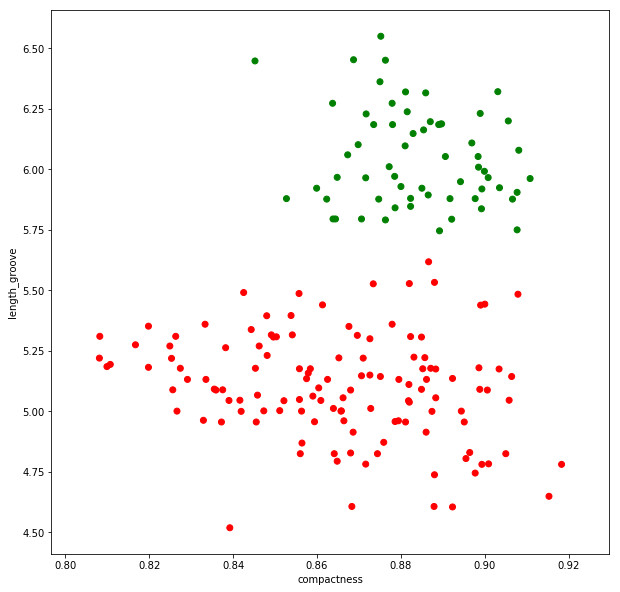

In [7]:
colors =["red", "green"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(train_data['compactness'].values, train_data['length_groove'].values, c=labels, cmap=cmap)
plt.xlabel('compactness')
plt.ylabel('length_groove')
plt.show()

<img src="../../../images/dbscan_lab_1.PNG">


Another example worth looking at is the length_groove vs length_kernel. We show the class distribution of scatter points in the plot below. 

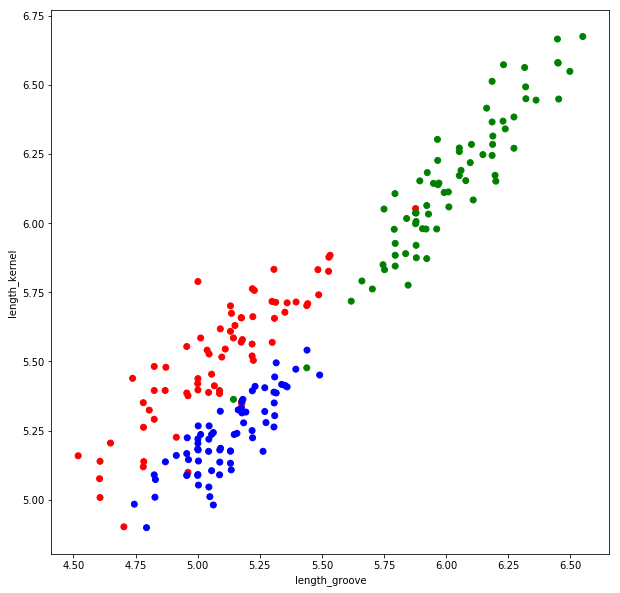

In [8]:
data_set = seeds[['length_groove', 'length_kernel','class']]
x = data_set["length_groove"]
y = data_set["length_kernel"]

colors =["red", "green","blue"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(x,y, c=data_set['class'], cmap=cmap)
plt.xlabel('length_groove')
plt.ylabel('length_kernel')
plt.show()

<img src="../../../images/dbscan_lab_2.png">


We can identify only two classes using by performing DBSCAN on the dataset. See the figure below 

In [10]:
full_data = data_set.drop(columns='class')
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(full_data)
labels = dbscan.labels_
unique_labels = np.unique(np.asanyarray(labels))
print("unique labels: {}".format(unique_labels))


unique labels: [-1  0  1]


unique labels: [-1  0  1]

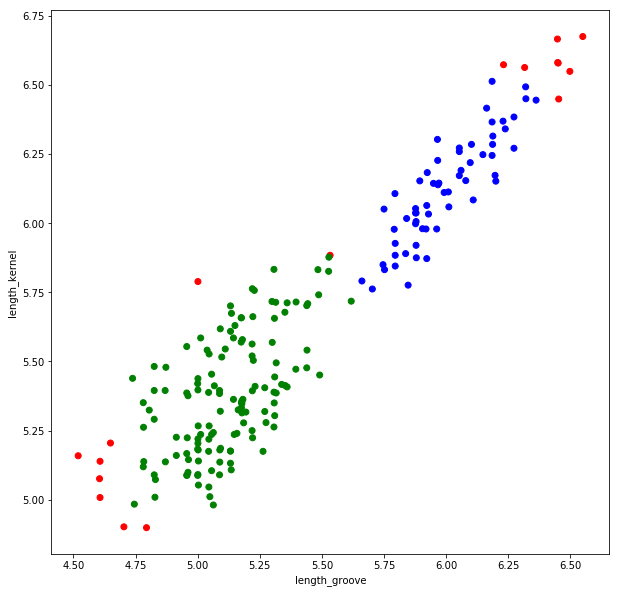

In [11]:
colors =["red", "green", 'blue']
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(data_set['length_groove'].values, data_set['length_kernel'].values, c=labels, cmap=cmap)
plt.xlabel('length_groove')
plt.ylabel('length_kernel')
plt.show()

<img src="../../../images/dbscan_lab_3.png">


The two classes are the green and the blue point. The third class of points labeled -1 are points that do not fit in either classes. These are points are too far from either cluster and too far from each other to form a cluster. 
